In [1]:
from pathlib import Path

from PIL import Image
import xml.etree.ElementTree as ET

from zokyo.augmentation.data import ZokyoData
from zokyo.augmentation import SnowScene, RainScene, BrightenScene
from zokyo.augmentation.utils import generate_mask_for_annotation_for_xml

import matplotlib.pyplot as plt
%matplotlib inline

To try out operations on a few sample of images, the following notebook can be referred. The image, annotation and masks must be encapsulated as an object of ZokyoData and passed to the instance of an Operation class.

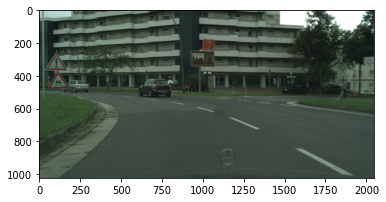

In [2]:
img_path = '../tests/images/0.png'
ann_path = '../tests/annotation/0.xml'
mask_path = '../tests/masks/0.png'

# create ZokyoData
data = ZokyoData()
data.name = Path(img_path).stem
data.image = Image.open(img_path)
data.mask = Image.open(mask_path)
xmlobject = ET.parse(ann_path)
num_classes = 2
mask_label_id = 1
data.annotation_mask = generate_mask_for_annotation_for_xml(xmlobject,num_classes, mask_label_id )
data.annotation = xmlobject


plt.imshow(data.image)

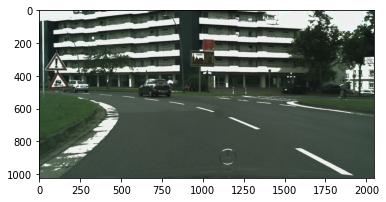

In [3]:
# Snow operation
snow_op = SnowScene(probability=1)
augmented_data = snow_op.perform_operation(data.copy())

plt.imshow(augmented_data.image)

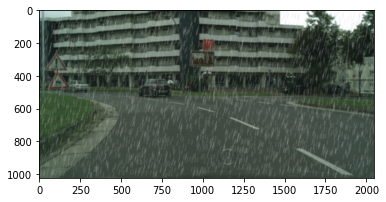

In [4]:
# Rain operation
rain_op = RainScene(probability=1, rain_type="heavy", slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, blur_value=7, brightness_coefficient=0.5, drop_color=[200, 200, 200])
augmented_data = rain_op.perform_operation(data.copy())

plt.imshow(augmented_data.image)

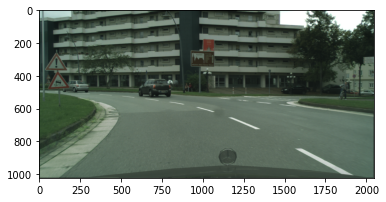

In [5]:
# Brightness operation for specific mask label(road)
bright_op = BrightenScene(probability=1, is_mask=True, mask_label=7, brightness=0.5)
augmented_data = bright_op.perform_operation(data.copy())

plt.imshow(augmented_data.image)